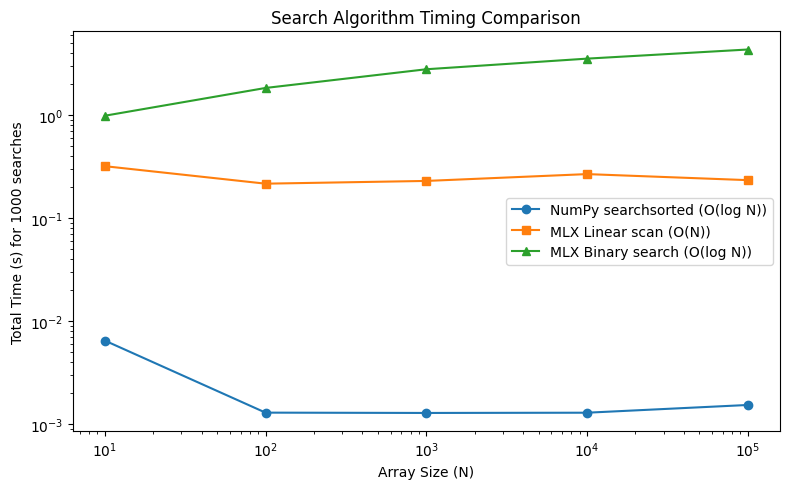

In [7]:
import mlx.core as mx
import numpy as np
import time
import matplotlib.pyplot as plt

# Linear scan (MLX)
def find_index_linear_scan(x_array, x_new):
    return mx.sum(x_array <= x_new) - 1

# Standalone binary search (MLX)
def find_index_binary_search(x_array, x_new):
    N = x_array.shape[0]
    left = mx.array(0)
    right = mx.array(N-1)
    while (right - left) > 1:
        mid = (left + right) // 2
        mid_val = x_array[mid]
        cond = mid_val <= x_new
        left = mx.where(cond, mid, left)
        right = mx.where(cond, right, mid)
    return left

# NumPy searchsorted
def numpy_searchsorted(x_array, x_new):
    return np.searchsorted(x_array, x_new, side='right') - 1

sizes = [10, 100, 1000, 10000, 100000]
results = []

for N in sizes:
    # Generate sorted arrays
    arr_np = np.linspace(0, 1, N, dtype=np.float32)
    arr_mx = mx.array(arr_np)
    x_new_np = np.random.uniform(0, 1, size=1000).astype(np.float32)
    x_new_mx = mx.array(x_new_np)

    # NumPy searchsorted timing
    t0 = time.time()
    idx_np = [numpy_searchsorted(arr_np, x) for x in x_new_np]
    t1 = time.time()
    numpy_time = t1 - t0

    # MLX linear scan timing
    t0 = time.time()
    idx_linear = [find_index_linear_scan(arr_mx, x).item() for x in x_new_mx]
    t1 = time.time()
    linear_time = t1 - t0

    # MLX binary search timing
    t0 = time.time()
    idx_binary = [find_index_binary_search(arr_mx, x).item() for x in x_new_mx]
    t1 = time.time()
    binary_time = t1 - t0

    results.append([N, numpy_time, linear_time, binary_time])

# Plotting
results = np.array(results)
plt.figure(figsize=(8, 5))
plt.plot(results[:,0], results[:,1], 'o-', label='NumPy searchsorted (O(log N))')
plt.plot(results[:,0], results[:,2], 's-', label='MLX Linear scan (O(N))')
plt.plot(results[:,0], results[:,3], '^-', label='MLX Binary search (O(log N))')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Array Size (N)')
plt.ylabel('Total Time (s) for 1000 searches')
plt.legend()
plt.title('Search Algorithm Timing Comparison')
plt.tight_layout()
plt.show()
